Files already downloaded and verified


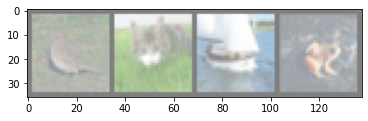

 bird   cat  ship  frog


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from app.datasets import SampleDataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataset = SampleDataset("./data", train=True, transform=ToTensor())

train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(make_grid(images))
# print labels
print(' '.join('%5s' % dataset.classes[labels[j]] for j in range(4)))